In [10]:
import pandas as pd
import sklearn.model_selection as modsel
import sklearn.decomposition as decomp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train= pd.read_csv('train_2017.csv')
property= pd.read_csv('properties_2017.csv')

/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = pd.merge(train, property, how='outer', sort=True, on=['parcelid'])

In [4]:
df_sales=df[['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','fips','roomcnt','yearbuilt','lotsizesquarefeet']]

In [5]:
df_y=['logerror']

In [12]:
desc_df = df.sample(10000).describe()
desc_df.loc['count']

parcelid                        10000.0
logerror                          272.0
airconditioningtypeid            2774.0
architecturalstyletypeid           34.0
basementsqft                        5.0
bathroomcnt                      9991.0
bedroomcnt                       9991.0
buildingclasstypeid                49.0
buildingqualitytypeid            6551.0
calculatedbathnbr                9588.0
decktypeid                         64.0
finishedfloor1squarefeet          668.0
calculatedfinishedsquarefeet     9833.0
finishedsquarefeet12             9112.0
finishedsquarefeet13               23.0
finishedsquarefeet15              638.0
finishedsquarefeet50              668.0
finishedsquarefeet6                60.0
fips                             9991.0
fireplacecnt                     1009.0
fullbathcnt                      9588.0
garagecarcnt                     2905.0
garagetotalsqft                  2905.0
heatingorsystemtypeid            6357.0
latitude                         9991.0


In [13]:
df_sales=df[['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','fips','roomcnt','yearbuilt','lotsizesquarefeet','logerror']]

/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


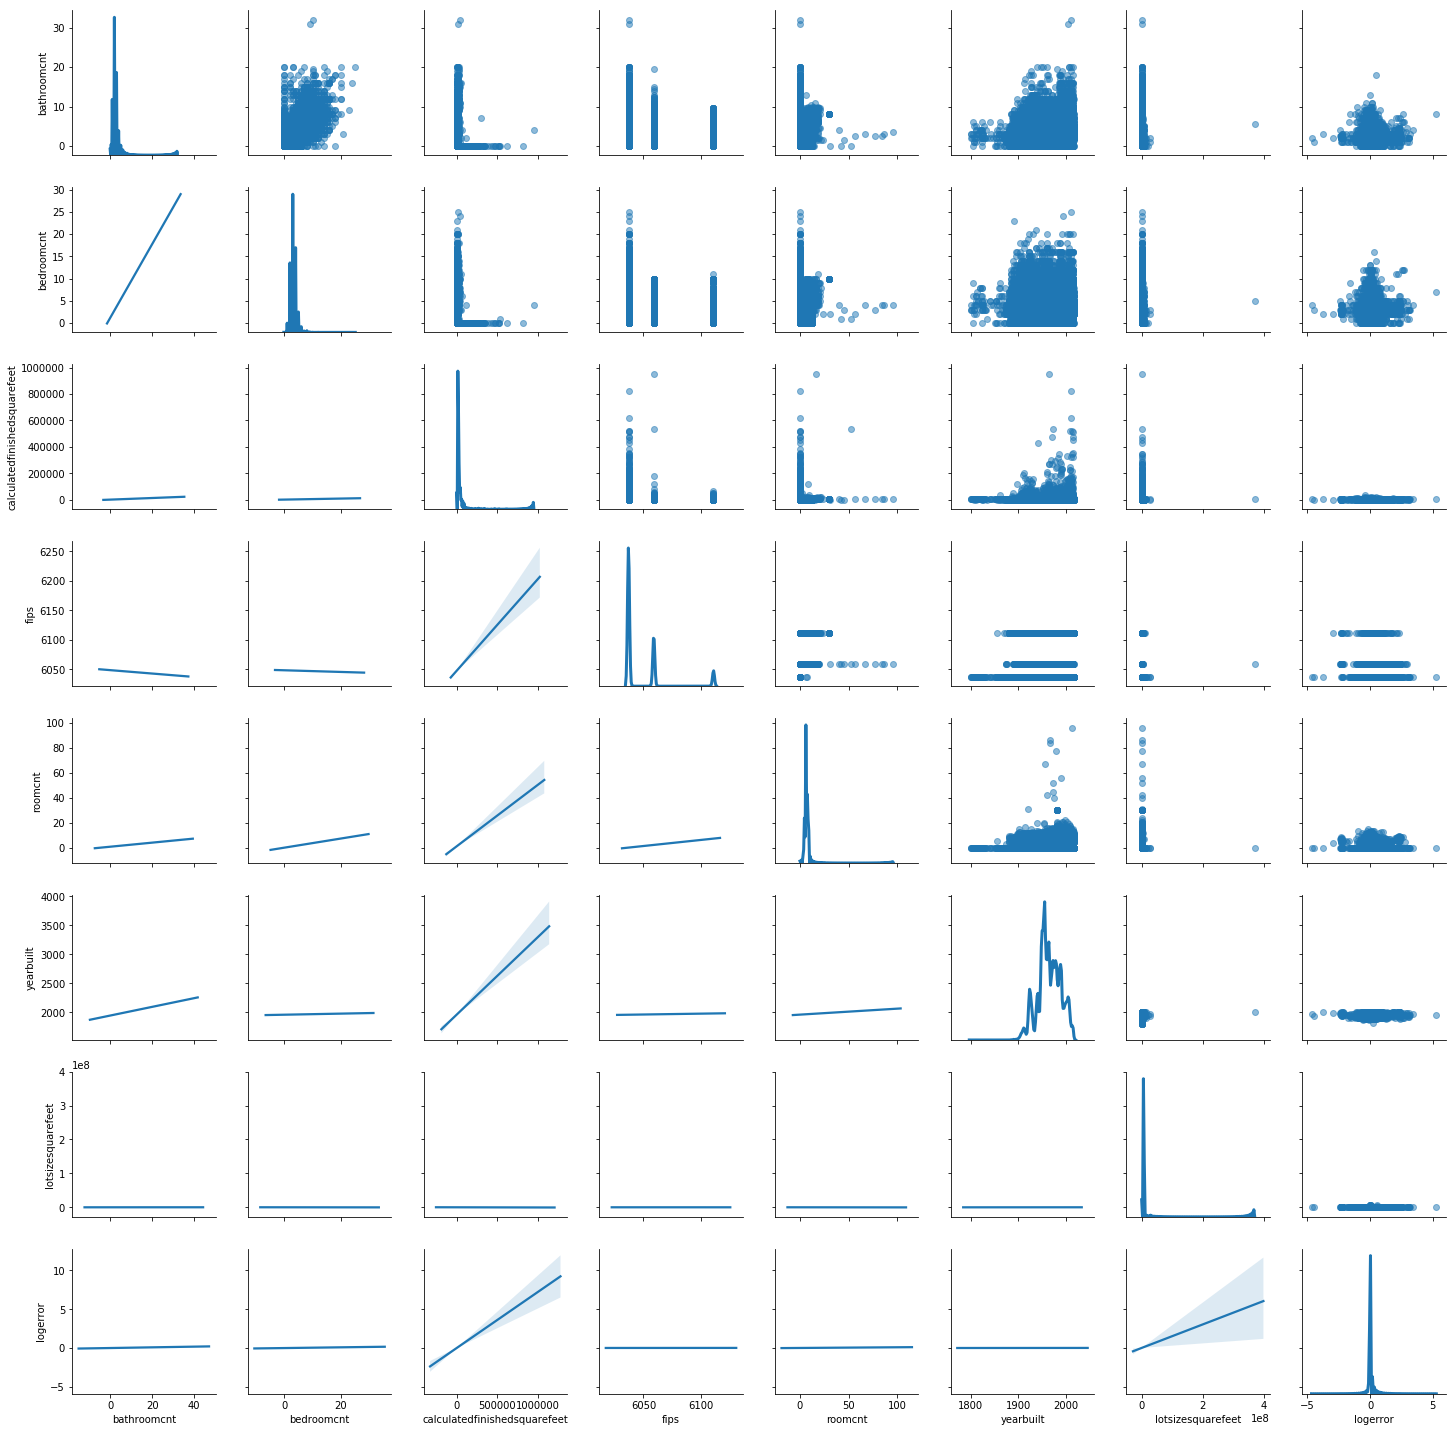

In [14]:
g = sns.PairGrid(df_sales, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                              bathroomcnt  bedroomcnt  \
bathroomcnt                      1.000000    0.699414   
bedroomcnt                       0.699414    1.000000   
calculatedfinishedsquarefeet     0.328418    0.242689   
fips                            -0.015290   -0.008865   
roomcnt                          0.061457    0.162139   
yearbuilt                        0.332185    0.048337   
lotsizesquarefeet                0.006322   -0.034263   
logerror                         0.025817    0.031638   

                              calculatedfinishedsquarefeet      fips  \
bathroomcnt                                       0.328418 -0.015290   
bedroomcnt                                        0.242689 -0.008865   
calculatedfinishedsquarefeet                      1.000000  0.015027   
fips                                              0.015027  1.000000   
roomcnt                                           0.033518  0.689723   
yearbuilt                                         0.10

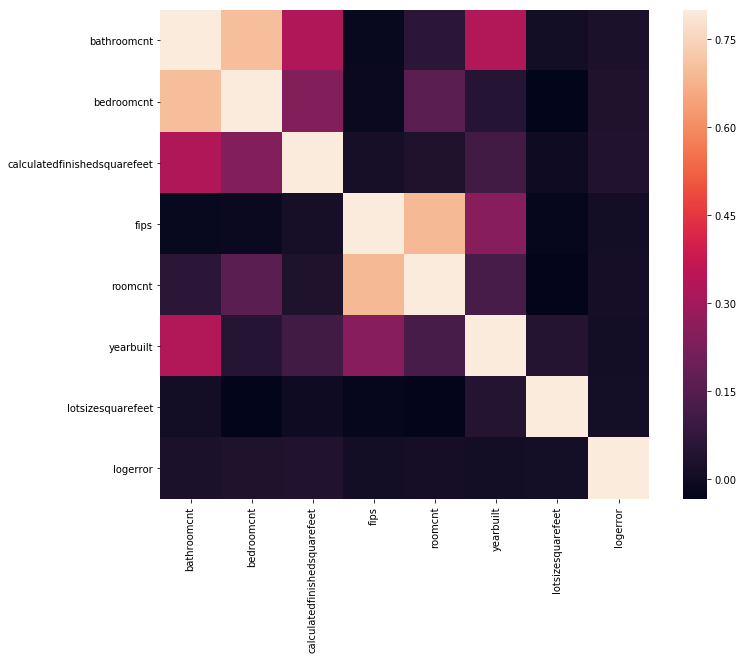

In [17]:
corrmat = df_sales.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [ ]:
X['home_age'] = 2019 - X.yearbuilt
# to get the accurate age of the home
X['bed_to_bath'] = X.bedroomcnt / X.bathroomcnt
#to have a ratio of bedroom to bathroom in the house 
X['lot_to_home'] = X.lotsizesquarefeet / X.calculatedfinishedsquarefeet
#to show how big the living space inside vs outside
